# Project - Hotel Review Analysis & Overall Sentiment Prediction


### Objective(s) - 

There are 2 business objectives attached to this project, which are also interlinked with each other.
1. To predict the overall rating or sentiment attached with the reviews given. To achieve this a classification model would be built to identify and differentiate the good reviews from the bad reviews.
2. To analyze the reviews and identify the commonly praised or criticized aspects of hotels. To achieve this, we will perform parts of speech tagging and use named entity recognition to filter out noun related to places, people or things related to the hotels within different types of reviews.


### Scope - 

By using the model, the hotels will be able to identify or predict the overall rating or sentiment attached with the reviews given by customers. Also, hotel owners will be able to identify the factors that are contributing to the success of the hotel, satisfaction of the customers or the factors that are holding the hotel down and which need to be urgently address to improve the customer satisfaction.

Since the reviews are posted on Trip advisors, a high rating or positive review will help the hotel's name appear higher in the search results, which could boost its business.

## Import Pre-requisite Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install TextBlob
!pip install wordcloud

## Importing Dataset

In [3]:
data = pd.read_csv("tripadvisor_hotel_reviews.csv")

## Data Understanding

In [4]:
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
data.shape

(20491, 2)

In [6]:
data = data.head(15000)

In [7]:
data.size

30000

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  15000 non-null  object
 1   Rating  15000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 234.5+ KB


## Text Pre-Processing

In order to use the reviews for analysis and model building, we will perform the following text preprocessing tasks:
- Remove or convert accented words.


- Remove unnecessary special characters and numbers.


- Convert all words in a sentence to lower case


- Lemmatize all words in a sentence. NOTE - The reason to lemmatize is because we want valid and existing english words for sentiment polarity scores and later use the words for parts of speech tagging & named entity recognition to identify nouns.


- Removing stopwords. NOTE - All stopwords except negative words like shouldn't, couldnt, not, no, etc have been removed as they negative words will change the context of the statements, which will be crucial for identifying a positive or negative sentiment.

In [9]:
import re
import nltk
import unicodedata
import textblob
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
import textblob

### Removing or converting accented words

In [11]:
def remove_accented_words(text):
    text = unicodedata.normalize("NFKD",text).encode("ascii","ignore").decode("utf-8","ignore")
    return text

### Removing Unnecessary characters

In [12]:
def remove_special_characters(text):
    text = " ".join(re.findall(r"[a-zA-Z]+",text))
    return text

### Converting all words to lowercase

In [13]:
def lowercase_sentence(text):
    text = " ".join([str(word).lower() for word in text.split(" ")])
    return text

### Lemmatization of words

In [14]:
def lemmatizer(text):
    lemmatizer = WordNetLemmatizer()
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split(" ")])
    return text

### Removing Stopwords (Except negative words)

In [15]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")
stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
negative_words = ['ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'no',
 'not',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]

In [17]:
stopwords = [i for i in stopwords if i not in negative_words]

In [18]:
def remove_stopwords(text):
    text = " ".join([word for word in text.split(" ") if word not in stopwords])
    return text

### New clean text column

In [19]:
def new_clean_text_column(variable):
    data["clean_text"] = data[variable].apply(lambda x:remove_special_characters(x))
    data["clean_text"] = data["clean_text"].apply(lambda x:remove_accented_words(x))
    data["clean_text"] = data["clean_text"].apply(lambda x:lowercase_sentence(x))
    data["clean_text"] = data["clean_text"].apply(lambda x:lemmatizer(x))
    data["clean_text"] = data["clean_text"].apply(lambda x:remove_stopwords(x))
    

In [20]:
new_clean_text_column("Review")

In [21]:
data.head()

,Review,Rating,clean_text
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice room not experience hotel monaco seattle ...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...


In [22]:
data["Sentiment_score"] = data.clean_text.apply(lambda x:textblob.TextBlob(x).sentiment.polarity)
data.head()

,Review,Rating,clean_text,Sentiment_score
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,0.208744
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,0.197355
2,nice rooms not 4* experience hotel monaco seat...,3,nice room not experience hotel monaco seattle ...,0.266138
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,0.504825
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,0.389286


## Exploratory Data Analysis

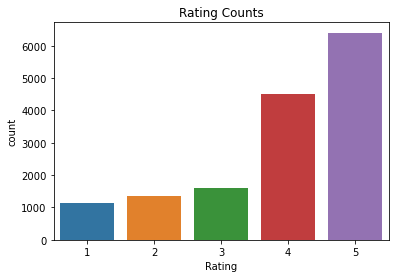

In [23]:
sns.countplot(data.Rating)
plt.title("Rating Counts")
plt.show()

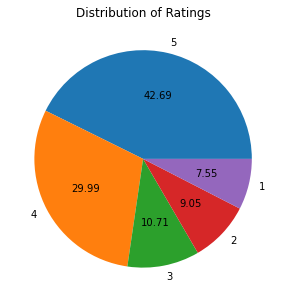

In [76]:
plt.figure(figsize=(5,5))
proportions = data.Rating.value_counts()
labels = data.Rating.value_counts().index
plt.pie(x=proportions,labels=labels,autopct="%.2f")
plt.title("Distribution of Ratings")
plt.show()

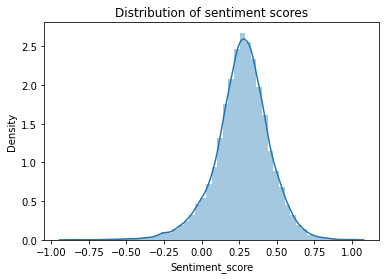

In [24]:
sns.distplot(data.Sentiment_score)
plt.title("Distribution of sentiment scores")
plt.show()

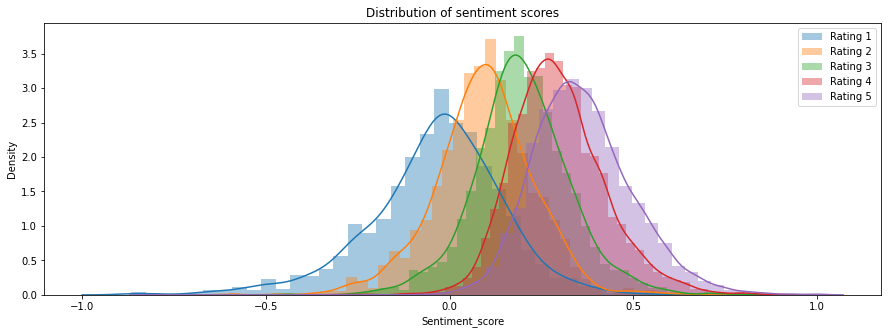

In [25]:
plt.figure(figsize=(15,5))
for i in sorted(data.Rating.unique()):
    sns.distplot(data[data.Rating == i]["Sentiment_score"],label=f"Rating {i}")
plt.title("Distribution of sentiment scores")
plt.legend()
plt.show()

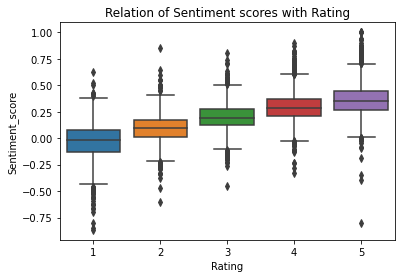

In [26]:
sns.boxplot(x=data.Rating,y=data.Sentiment_score)
plt.title("Relation of Sentiment scores with Rating")
plt.show()

In [27]:
data.groupby("Rating")["Sentiment_score"].mean()

Rating
1   -0.036496
2    0.093338
3    0.196949
4    0.295886
5    0.362001
Name: Sentiment_score, dtype: float64

#### Inferences - 
Based on the analysis of the review,associated sentiments and ratings and understanding the relationship between reviews, sentiments and corresponding ratings, we can conclude the following - 
- Majority of the reviews given are associated with positive ratings i.e 5 star rating (42% approx) followed by 4 star ratings (30% approx)


- Majority of the sentiments scores associated with the reviews are between 0.10 to 0.50, indicating mostly above average to positive sentiments conveyed in reviews.


- On Analysing and comparing the distributions of sentiments scores for reviews for associated ratings, we saw most of the distributions overlapping, indicating there could be difficulty in differentiating between a highly negative review and negative review, negative / positive review and neutral review or highly positive review from positive reviews.


- On analysing the boxplots associated with rating and sentiment scores, we observe a lot of overlapping of boxplots. The medians and distrubutions of sentiments scores for rating 4 and 5 are nearly overlapping each other and similar.


Based on the above analysis, we can conclude that differntiating between reviews on a 5 rating scale would be difficult. Hence, we will transform the rating scale to a 3 category rating scale i.e negative, neutral and positive based on the sentiment scores

In [28]:
data["Review_Sentiment"] = None
for i in data.index:
    if data.loc[i,"Sentiment_score"] <= 0:
        data.loc[i,"Review_Sentiment"] = "Negative_Review"
    elif data.loc[i,"Sentiment_score"] <= 0.30:
        data.loc[i,"Review_Sentiment"] = "Neutral_Review"
    else:
        data.loc[i,"Review_Sentiment"] = "Positive_Review"

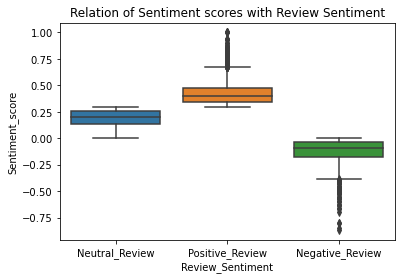

In [29]:
sns.boxplot(x=data.Review_Sentiment,y=data.Sentiment_score)
plt.title("Relation of Sentiment scores with Review Sentiment")
plt.show()

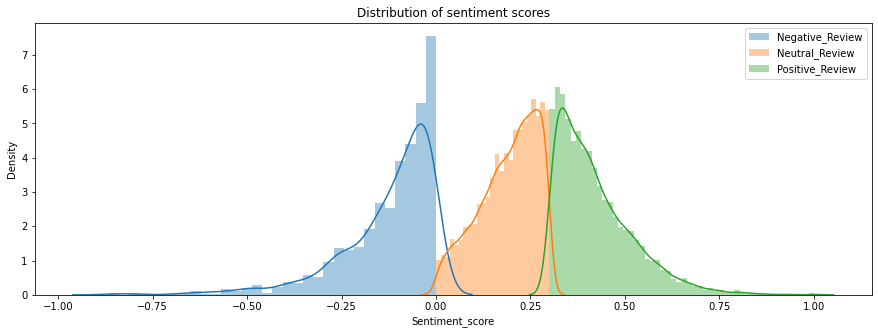

In [30]:
plt.figure(figsize=(15,5))
for i in sorted(data.Review_Sentiment.unique()):
    sns.distplot(data[data.Review_Sentiment == i]["Sentiment_score"],label=i)
plt.title("Distribution of sentiment scores")
plt.legend()
plt.show()

#### Inference - 
- On comparing a sentiment scores of the 3 different types of reviews i.e negative, neutral and positive, we can see a clear differentiation in sentiment scores.

- Hence, this new rating scale would be useful and more easy to predict.

In [31]:
from wordcloud import WordCloud

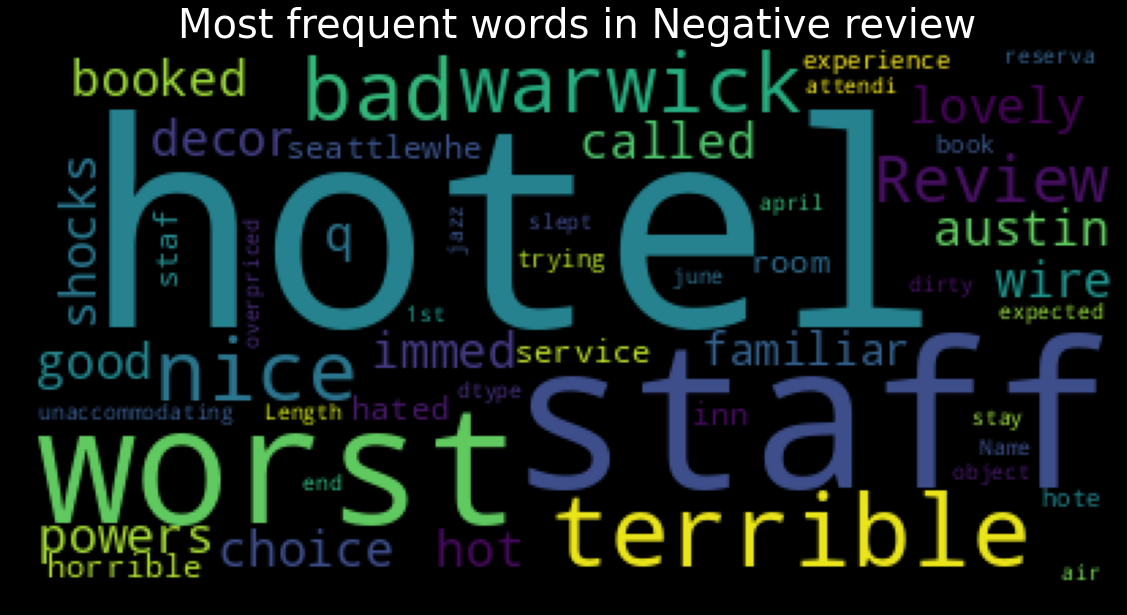

In [32]:
negative_reviews = data[data.Review_Sentiment=="Negative_Review"]["Review"]
wc = WordCloud()
wc.generate(str(negative_reviews))
plt.figure(figsize=(20,10),facecolor="k")
plt.title("Most frequent words in Negative review",color="white",fontsize=40)
plt.imshow(wc)
plt.show()

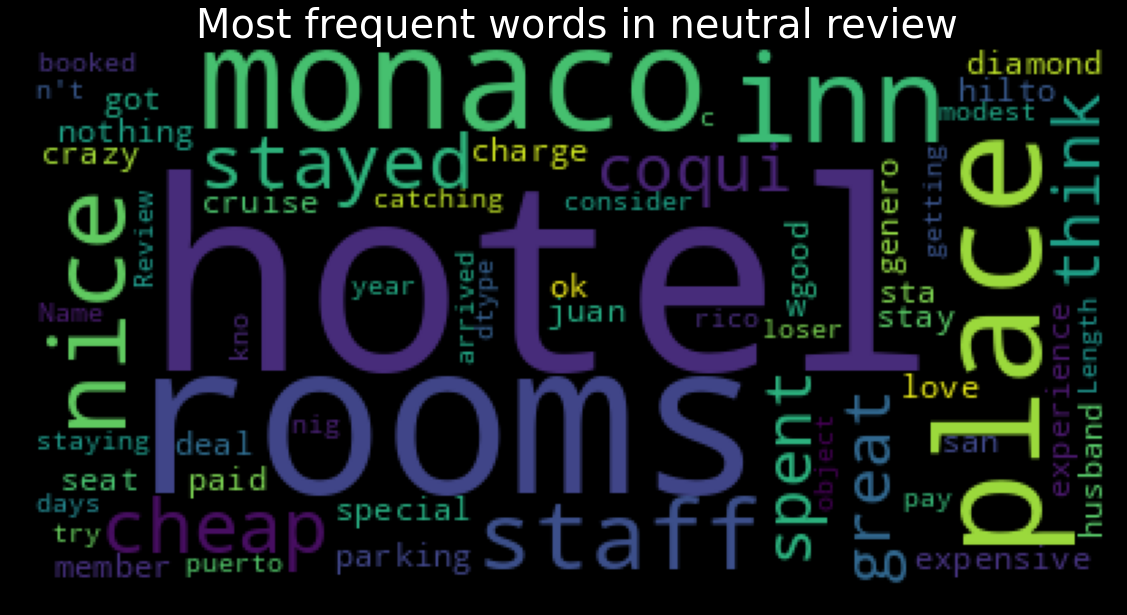

In [33]:
neutral_reviews = data[data.Review_Sentiment=="Neutral_Review"]["Review"]
wc = WordCloud()
wc.generate(str(neutral_reviews))
plt.figure(figsize=(20,10),facecolor="k")
plt.title("Most frequent words in neutral review",color="white",fontsize=40)
plt.imshow(wc)
plt.show()

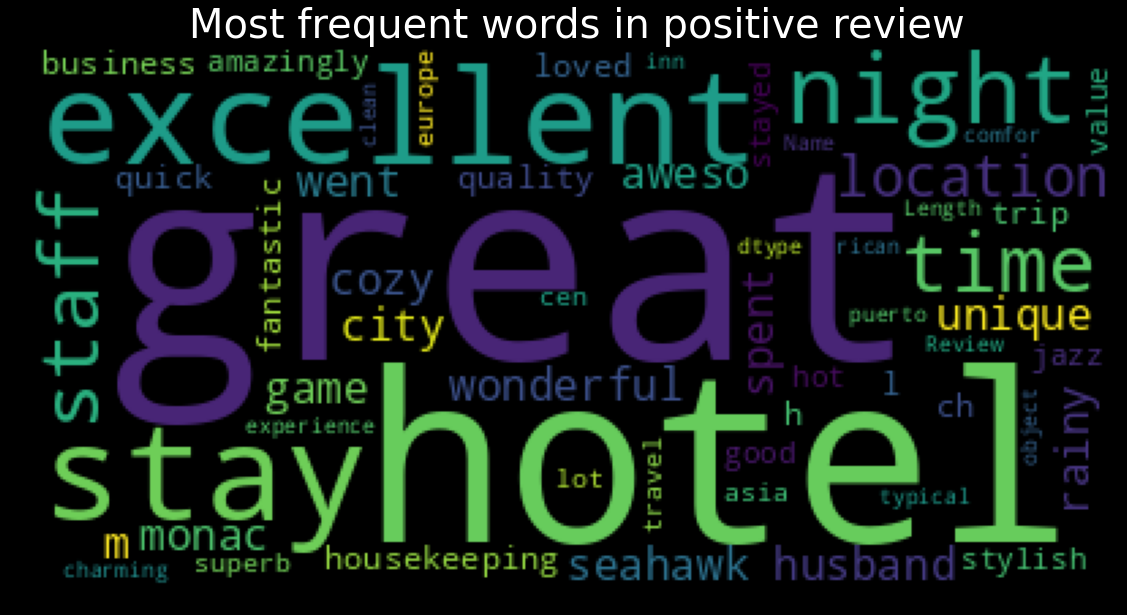

In [34]:
positive_reviews = data[data.Review_Sentiment=="Positive_Review"]["Review"]
wc = WordCloud()
wc.generate(str(positive_reviews))
plt.figure(figsize=(20,10),facecolor="k")
plt.title("Most frequent words in positive review",color="white",fontsize=40)
plt.imshow(wc)
plt.show()

## Text Vectorizer and Splitting data into Train / Test

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split

In [36]:
X = data.Review
y = data.Review_Sentiment.replace({"Positive_Review":2,"Neutral_Review":1,"Negative_Review":0})

xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=0,test_size=0.25,stratify=y)

In [37]:
tf = TfidfVectorizer().fit(xtrain)

xtrain_tf = tf.transform(xtrain)
xtest_tf = tf.transform(xtest)

In [38]:
cv = CountVectorizer().fit(xtrain)

xtrain_cv = cv.transform(xtrain)
xtest_cv = cv.transform(xtest)

## Model Building & Evaluation

In [39]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.metrics import f1_score, confusion_matrix, classification_report,recall_score
from sklearn.model_selection import cross_val_score

In [40]:
results_baseline = pd.DataFrame({"Model":None,"Vectorizer":None,"Train f1 macro":None,"Test f1 macro":None,"CV F1 macro":None,"CV std in scores":None},index=range(3))

results_cv = pd.DataFrame({"LR Count Vec":None,"LR Tf-idf":None,"NB Count Vec":None},index=range(3))

### Logistic Regression using Count Vectorizer

Train Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       807
           1       1.00      1.00      1.00      5465
           2       1.00      1.00      1.00      4978

    accuracy                           1.00     11250
   macro avg       1.00      1.00      1.00     11250
weighted avg       1.00      1.00      1.00     11250


Average f1 score: 0.7729982382986865
deviation in f1 scores: 0.0037435166529030525

Test Performance:
              precision    recall  f1-score   support

           0       0.71      0.63      0.67       269
           1       0.83      0.82      0.83      1822
           2       0.85      0.88      0.87      1659

    accuracy                           0.83      3750
   macro avg       0.80      0.78      0.79      3750
weighted avg       0.83      0.83      0.83      3750



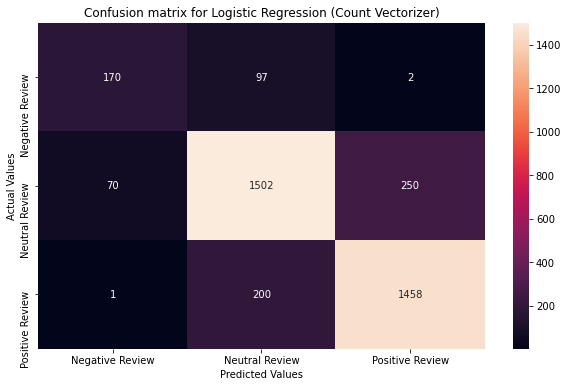

In [77]:
lr_cv = LogisticRegression().fit(xtrain_cv,ytrain)

lr_cv_train_pred = lr_cv.predict(xtrain_cv) 
lr_cv_test_pred = lr_cv.predict(xtest_cv)

lr_cv_train_f1 = f1_score(ytrain,lr_cv_train_pred,average="macro")
lr_cv_test_f1 = f1_score(ytest,lr_cv_test_pred,average="macro")

CV_lr_cv = cross_val_score(LogisticRegression(),xtrain_cv,ytrain,cv=3,scoring="f1_macro")

results_baseline.iloc[0,0] = "Logistic Regression"
results_baseline.iloc[0,1] = "Count Vectorizer"
results_baseline.iloc[0,2] = lr_cv_train_f1
results_baseline.iloc[0,3] = lr_cv_test_f1
results_baseline.iloc[0,4] = CV_lr_cv.mean()
results_baseline.iloc[0,5] = CV_lr_cv.std()

results_cv["LR Count Vec"] = CV_lr_cv

print("Train Performance:",classification_report(ytrain,lr_cv_train_pred),sep="\n")
print()
print(f"Average f1 score: {CV_lr_cv.mean()}",f"deviation in f1 scores: {CV_lr_cv.std()}",sep="\n")
print()
print("Test Performance:",classification_report(ytest,lr_cv_test_pred),sep="\n")

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(ytest,lr_cv_test_pred),annot=True,fmt="g")
plt.title("Confusion matrix for Logistic Regression (Count Vectorizer)")
plt.xticks([0.5,1.5,2.5],["Negative Review","Neutral Review","Positive Review"])
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.yticks([0.5,1.5,2.5],["Negative Review","Neutral Review","Positive Review"])
plt.show()

Train Performance:
              precision    recall  f1-score   support

           0       0.99      0.62      0.76       807
           1       0.90      0.96      0.93      5465
           2       0.95      0.95      0.95      4978

    accuracy                           0.93     11250
   macro avg       0.95      0.84      0.88     11250
weighted avg       0.93      0.93      0.93     11250


Average f1 score: 0.6748053639950858
deviation in f1 scores: 0.006400961492544248

Test Performance:
              precision    recall  f1-score   support

           0       0.77      0.29      0.43       269
           1       0.79      0.84      0.81      1822
           2       0.84      0.86      0.85      1659

    accuracy                           0.81      3750
   macro avg       0.80      0.67      0.70      3750
weighted avg       0.81      0.81      0.80      3750



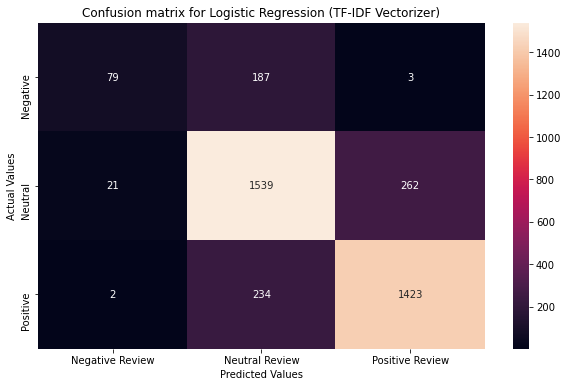

In [78]:
lr_tf = LogisticRegression().fit(xtrain_tf,ytrain)

lr_tf_train_pred = lr_tf.predict(xtrain_tf) 
lr_tf_test_pred = lr_tf.predict(xtest_tf)

lr_tf_train_f1 = f1_score(ytrain,lr_tf_train_pred,average="macro")
lr_tf_test_f1 = f1_score(ytest,lr_tf_test_pred,average="macro")

CV_lr_tf = cross_val_score(LogisticRegression(),xtrain_tf,ytrain,cv=3,scoring="f1_macro")

results_baseline.iloc[1,0] = "Logistic Regression"
results_baseline.iloc[1,1] = "TF-IDF Vectorizer"
results_baseline.iloc[1,2] = lr_tf_train_f1
results_baseline.iloc[1,3] = lr_tf_test_f1
results_baseline.iloc[1,4] = CV_lr_tf.mean()
results_baseline.iloc[1,5] = CV_lr_tf.std()

results_cv["LR Tf-idf"] = CV_lr_tf

print("Train Performance:",classification_report(ytrain,lr_tf_train_pred),sep="\n")
print()
print(f"Average f1 score: {CV_lr_tf.mean()}",f"deviation in f1 scores: {CV_lr_tf.std()}",sep="\n")
print()
print("Test Performance:",classification_report(ytest,lr_tf_test_pred),sep="\n")

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(ytest,lr_tf_test_pred),annot=True,fmt="g")
plt.title("Confusion matrix for Logistic Regression (TF-IDF Vectorizer)")
plt.xticks([0.5,1.5,2.5],["Negative Review","Neutral Review","Positive Review"])
plt.yticks([0.5,1.5,2.5],["Negative","Neutral","Positive"])
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

Train Performance:
              precision    recall  f1-score   support

           0       0.64      0.82      0.71       807
           1       0.83      0.53      0.65      5465
           2       0.65      0.88      0.75      4978

    accuracy                           0.71     11250
   macro avg       0.71      0.74      0.70     11250
weighted avg       0.74      0.71      0.70     11250


Average f1 score: 0.62246568193006
deviation in f1 scores: 0.0035772919660681797

Test Performance:
              precision    recall  f1-score   support

           0       0.47      0.58      0.52       269
           1       0.75      0.47      0.58      1822
           2       0.62      0.85      0.72      1659

    accuracy                           0.65      3750
   macro avg       0.61      0.63      0.60      3750
weighted avg       0.67      0.65      0.63      3750



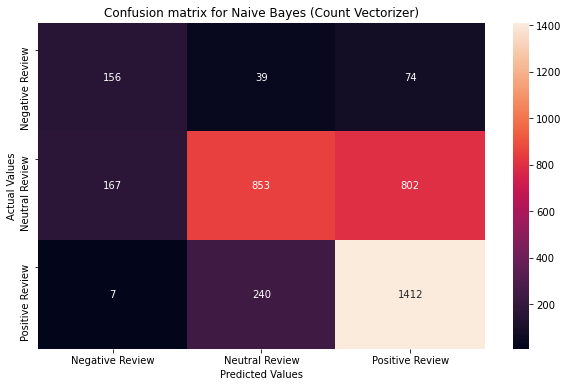

In [79]:
nb_cv = BernoulliNB().fit(xtrain_cv,ytrain)

nb_cv_train_pred = nb_cv.predict(xtrain_cv) 
nb_cv_test_pred = nb_cv.predict(xtest_cv)

nb_cv_train_f1 = f1_score(ytrain,nb_cv_train_pred,average="macro")
nb_cv_test_f1 = f1_score(ytest,nb_cv_test_pred,average="macro")

CV_nb_cv = cross_val_score(BernoulliNB(),xtrain_cv,ytrain,cv=3,scoring="f1_macro")

results_baseline.iloc[2,0] = "Naive Bayes"
results_baseline.iloc[2,1] = "Count Vectorizer"
results_baseline.iloc[2,2] = nb_cv_train_f1
results_baseline.iloc[2,3] = nb_cv_test_f1
results_baseline.iloc[2,4] = CV_nb_cv.mean()
results_baseline.iloc[2,5] = CV_nb_cv.std()

results_cv["NB Count Vec"] = CV_nb_cv

print("Train Performance:",classification_report(ytrain,nb_cv_train_pred),sep="\n")
print()
print(f"Average f1 score: {CV_nb_cv.mean()}",f"deviation in f1 scores: {CV_nb_cv.std()}",sep="\n")
print()
print("Test Performance:",classification_report(ytest,nb_cv_test_pred),sep="\n")

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(ytest,nb_cv_test_pred),annot=True,fmt="g")
plt.title("Confusion matrix for Naive Bayes (Count Vectorizer)")
plt.xticks([0.5,1.5,2.5],["Negative Review","Neutral Review","Positive Review"])
plt.yticks([0.25,1.25,2.25],["Negative Review","Neutral Review","Positive Review"])
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

In [44]:
results_cv

,LR Count Vec,LR Tf-idf,NB Count Vec
0,0.765984,0.674484,0.444766
1,0.775183,0.682801,0.448213
2,0.772416,0.667131,0.443123


<AxesSubplot:>

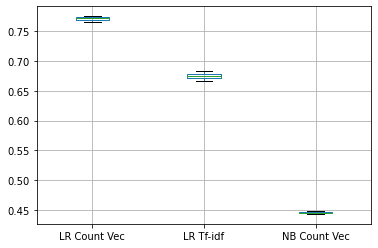

In [45]:
results_cv.boxplot()

In [46]:
results_baseline

,Model,Vectorizer,Train f1 macro,Test f1 macro,CV F1 macro,CV std in scores
0,Logistic Regression,Count Vectorizer,0.99912,0.782239,0.771194,0.00385381
1,Logistic Regression,TF-IDF Vectorizer,0.88064,0.696682,0.674805,0.00640096
2,Naive Bayes,Count Vectorizer,0.606893,0.464029,0.445367,0.0021211


#### Inferences - 
- On analysing the Logistic Regression and Naive Bayes models created using several vectorization techniques, we observed the the count vectorizer technique gives the best results in terms of f1 macro scores across train & test samples and during cross validation


- Between logistic regression and naive bayes, the logistc regression model built with count vectorizer gives the best results in respect to macro f1 scores acquired for train (0.99), test (0.78) and cross validation (0.77) samples.


- It also provides a very low deviation in  f1 macro scores during cross validation i.e only 0.3%, which proves that the model is very stable.


- Going forward, we will use Logitic regression model with count vectorizer and tune the count vectorizer model using a custom grid search method.

#### NOTE - 

- Going forward we will use f1 macro along recall to check which combination of paramters for the count vectorizer gives the best results.


- We will also consider recall because it is very important for a hotel to be able to identify all negative reviews correctly so that it can identify any and all possible issues and try to correct them.

## Parameter Tuning for the Count Vectorizer Model

In [47]:
params = []
f1_scores = []
recalls = []
cv_recalls = []
cv_std = []

for ngram in range(1,4):
    for mindf in range(2,10,2):
        for maxdf in [0.60,0.70,0.80]:
            params.append((ngram,mindf,maxdf))
            CV = CountVectorizer(ngram_range=(1,ngram),min_df=mindf,max_df=maxdf).fit(xtrain)
            CV_xtrain = CV.transform(xtrain)
            CV_xtest = CV.transform(xtest)
            lr = LogisticRegression().fit(CV_xtrain,ytrain)
            cross_val = cross_val_score(LogisticRegression(),CV_xtrain,ytrain,cv=3,scoring="recall_macro")
            CV_xtest_f1 = f1_score(lr.predict(CV_xtest),ytest,average="macro")
            CV_xtest_recall = recall_score(lr.predict(CV_xtest),ytest,average="macro")
            f1_scores.append(CV_xtest_f1)
            recalls.append(CV_xtest_recall)
            cv_recalls.append(cross_val.mean())
            cv_std.append(cross_val.std())

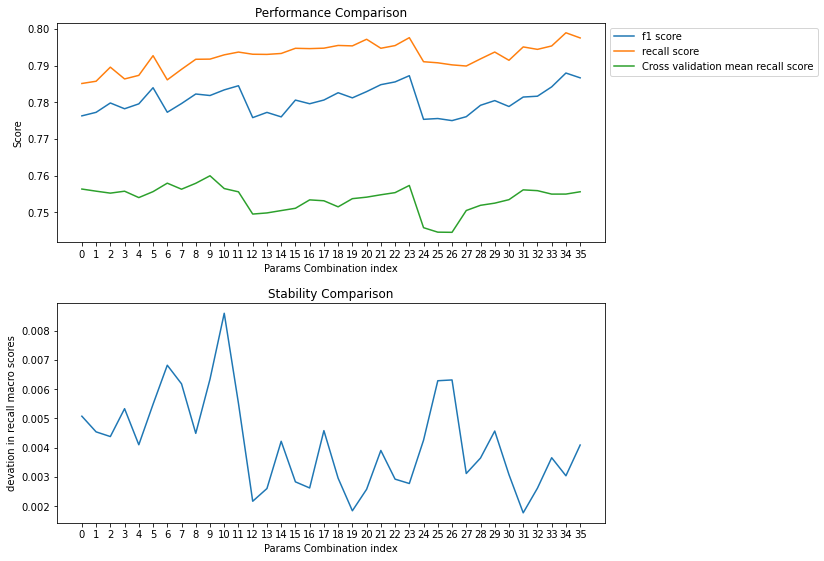

In [48]:

plt.figure(figsize = (12,8))

plt.subplot(2,1,1)
plt.plot(range(len(params)),f1_scores,label="f1 score")
plt.plot(range(len(params)),recalls,label="recall score")
plt.plot(range(len(params)),cv_recalls,label="Cross validation mean recall score")
plt.ylabel("Score")
plt.xlabel("Params Combination index")
plt.xticks(range(0,len(params)))
plt.title("Performance Comparison")
plt.legend(bbox_to_anchor=(1,1))

plt.tight_layout(pad=3,h_pad=3)

plt.subplot(2,1,2)
plt.plot(range(len(params)),cv_std)
plt.ylabel("devation in recall macro scores")
plt.xlabel("Params Combination index")
plt.xticks(range(0,len(params)))
plt.title("Stability Comparison")
plt.show()

In [83]:
print(f"Parameters with highest stability and performance: {params[34]}")

Parameters with highest stability and performance: (3, 8, 0.7)


Ngrams: Unigrams/Bigrams - Min document frequency: 8 - Max document frequency: 80% of documents
Train Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       807
           1       1.00      1.00      1.00      5465
           2       1.00      1.00      1.00      4978

    accuracy                           1.00     11250
   macro avg       1.00      1.00      1.00     11250
weighted avg       1.00      1.00      1.00     11250


Average f1 score: 0.7712317267437051
deviation in f1 scores: 0.002685384445368814

Test Performance:
              precision    recall  f1-score   support

           0       0.71      0.64      0.67       269
           1       0.83      0.83      0.83      1822
           2       0.85      0.87      0.86      1659

    accuracy                           0.83      3750
   macro avg       0.80      0.78      0.79      3750
weighted avg       0.83      0.83      0.83      3750



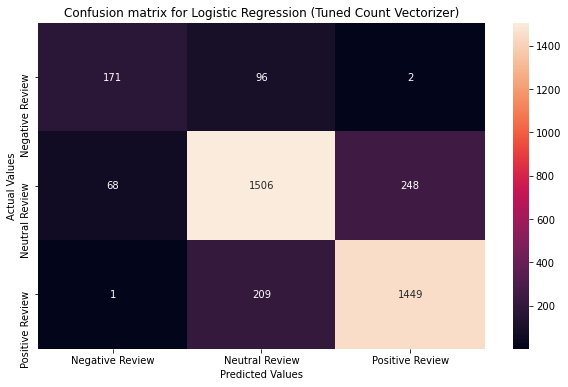

In [84]:
cv = CountVectorizer(ngram_range=(1,3),min_df=8,max_df=0.7).fit(xtrain)

xtrain_cv = cv.transform(xtrain)
xtest_cv = cv.transform(xtest)

lr_cv = LogisticRegression().fit(xtrain_cv,ytrain)

lr_cv_train_pred = lr_cv.predict(xtrain_cv) 
lr_cv_test_pred = lr_cv.predict(xtest_cv)

lr_cv_train_f1 = f1_score(ytrain,lr_cv_train_pred,average="macro")
lr_cv_test_f1 = f1_score(ytest,lr_cv_test_pred,average="macro")

CV_lr_cv = cross_val_score(LogisticRegression(),xtrain_cv,ytrain,cv=3,scoring="f1_macro")
print("Ngrams: Unigrams/Bigrams - Min document frequency: 8 - Max document frequency: 80% of documents")
print("Train Performance:",classification_report(ytrain,lr_cv_train_pred),sep="\n")
print()
print(f"Average f1 score: {CV_lr_cv.mean()}",f"deviation in f1 scores: {CV_lr_cv.std()}",sep="\n")
print()
print("Test Performance:",classification_report(ytest,lr_cv_test_pred),sep="\n")

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(ytest,lr_cv_test_pred),annot=True,fmt="g")
plt.title("Confusion matrix for Logistic Regression (Tuned Count Vectorizer)")
plt.xticks([0.5,1.5,2.5],["Negative Review","Neutral Review","Positive Review"])
plt.yticks([0.5,1.5,2.5],["Negative Review","Neutral Review","Positive Review"])
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

#### Inference - 

- From the customer grid search technique, we identified a combination of parameters for Count Vectozier where we will use unigrams and bigrams, use terms that have appeared atleast 8 times across all documents and have appeared in 80% documents at max.


- On building the logistic regression model with the tuned count vectorizer, we observed not much change in results from the logistic regression model built using original count vectorizer.

- We have managed to increase recall score of negative reviews from 0.63 to 0.64. 


- In terms of stability, we have managed to achieve macro recall score of 0.77 during cross validation with deviation of only 0.2% in the scores, indicating that the model is performing very stable and consistent.

## Review Analysis:

### Pos Tag and Named Entity Recognition

- We will now use parts of speech tagging and named entity recognition to understand which are the most common places or things related to the hotels within the reviews of different types.


- This will help hotel owners and businesses understand:
     1. In terms of positive reviews, which factors have been really crucial or important for the success and satisfaction of the customers.
     2. In terms of negative reviews, what the areas or aspects the hotel owners really need to look into to improve the experience of customers.

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [54]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### *Negative Reviews :*

In [55]:
negative_reviews = data[data.Review_Sentiment=="Negative_Review"]["clean_text"]
neutral_reviews = data[data.Review_Sentiment=="Neutral_Review"]["clean_text"]
positive_reviews = data[data.Review_Sentiment=="Positive_Review"]["clean_text"]

In [56]:
negative_reviews = negative_reviews.apply(lambda x:nltk.word_tokenize(x))
negative_reviews = negative_reviews.apply(lambda x:nltk.pos_tag(x))
negative_reviews.head()

13    [(nice, JJ), (hotel, NN), (not, RB), (nice, JJ...
40    [(bad, JJ), (choice, NN), (booked, VBD), (hote...
42    [(warwick, JJ), (bad, JJ), (good, JJ), (review...
44    [(austin, JJ), (power, NN), (decor, NN), (fami...
65    [(hated, VBN), (inn, NN), (terrible, JJ), (roo...
Name: clean_text, dtype: object

In [57]:
named_entities = []
entity_types = []

for sent in negative_reviews:
    for entity_tag in sent:
        named_entities.append(entity_tag[0])
        entity_types.append(entity_tag[1])

negative_reviews_ner = pd.DataFrame({"Entity Name":named_entities,"Entity Type":entity_types})

In [58]:
negative_reviews_ner = (negative_reviews_ner.groupby(["Entity Name","Entity Type"])
                    .size().sort_values(ascending=False)
                    .reset_index()
                    .rename(columns={0:"Frequency"}))

negative_reviews_ner[negative_reviews_ner["Entity Type"] == "NN"].head(20)

,Entity Name,Entity Type,Frequency
0,room,NN,2895
1,hotel,NN,2683
4,night,NN,766
5,day,NN,686
6,staff,NN,644
7,service,NN,641
8,time,NN,619
10,place,NN,451
11,food,NN,419
13,stay,NN,391


In [59]:
negative_reviews = negative_reviews.apply(lambda x:" ".join([word for word,pos in x if pos in ["NN","NNS","JJ","JJS","JJR"]]))
CV = CountVectorizer(ngram_range=(2,2),min_df=3,binary=False).fit(negative_reviews)

Text(0.5, 1.0, 'Top 20 Bag of Words in negative Reviews')

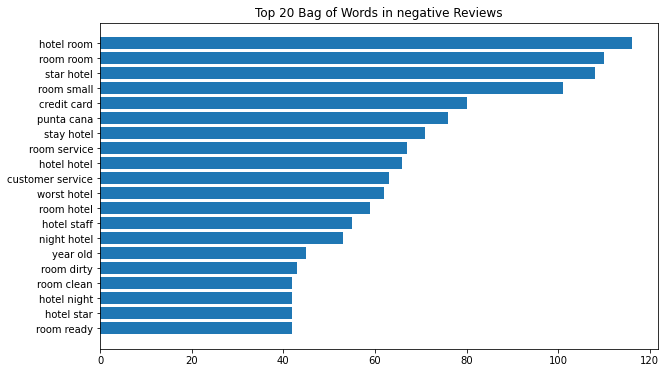

In [60]:
negative_df = pd.DataFrame(CV.transform(negative_reviews).toarray(),columns=CV.get_feature_names())

negative_words = {}
for words in negative_df.columns:
    negative_words[words] = negative_df[words].sum()
            
            
negative_df = pd.DataFrame({"Words":negative_words.keys(),"Count":negative_words.values()})
negative_df.sort_values("Count",ascending=False,inplace=True)
negative_df = negative_df.iloc[:20].sort_values("Count",ascending=True)


plt.figure(figsize=(10,6))
plt.barh(y=negative_df.Words,width=negative_df.Count)
plt.title("Top 20 Bag of Words in negative Reviews")

#### Observations - 
- In respect to negative reviews, some of the most frequently occured words with respect to the hotel are the Staff, Service, Food, Desk, Bathrooms, Water and the Floor.


- Also, when using a bag of words model to identify a commonly used set of 2 words across negative reviews, we observed issues such as hotel room being small, credit cards, room service, customer service and the hotel staff


- Many reviews have also laid focus on cleaniness of the room and also the well prepared and ready the room was for occupancy.

### *Neutral Reviews :* 

In [61]:
neutral_reviews = neutral_reviews.apply(lambda x:nltk.word_tokenize(x))
neutral_reviews = neutral_reviews.apply(lambda x:nltk.pos_tag(x))
neutral_reviews.head()

0    [(nice, JJ), (hotel, NN), (expensive, JJ), (pa...
1    [(ok, JJ), (nothing, NN), (special, JJ), (char...
2    [(nice, JJ), (room, NN), (not, RB), (experienc...
5    [(love, VB), (monaco, JJ), (staff, NN), (husba...
8    [(hotel, NN), (stayed, VBD), (hotel, NN), (mon...
Name: clean_text, dtype: object

In [62]:
named_entities = []
entity_types = []

for sent in neutral_reviews:
    for entity_tag in sent:
        named_entities.append(entity_tag[0])
        entity_types.append(entity_tag[1])

neutral_reviews_ner = pd.DataFrame({"Entity Name":named_entities,"Entity Type":entity_types})

In [63]:
neutral_reviews_ner = (neutral_reviews_ner.groupby(["Entity Name","Entity Type"])
                    .size().sort_values(ascending=False)
                    .reset_index()
                    .rename(columns={0:"Frequency"}))

neutral_reviews_ner[neutral_reviews_ner["Entity Type"] == "NN"].head(20)

,Entity Name,Entity Type,Frequency
0,room,NN,20734
1,hotel,NN,20385
5,night,NN,6438
6,staff,NN,6178
7,day,NN,6050
8,time,NN,5790
11,beach,NN,4428
12,service,NN,4238
13,food,NN,4170
14,resort,NN,4148


In [64]:
neutral_reviews

0        [(nice, JJ), (hotel, NN), (expensive, JJ), (pa...
1        [(ok, JJ), (nothing, NN), (special, JJ), (char...
2        [(nice, JJ), (room, NN), (not, RB), (experienc...
5        [(love, VB), (monaco, JJ), (staff, NN), (husba...
8        [(hotel, NN), (stayed, VBD), (hotel, NN), (mon...
                               ...                        
14992    [(cheap, NN), (paid, VBN), (cheap, JJ), (place...
14995    [(consider, VB), (staying, VBG), (coqui, NN), ...
14996    [(modest, JJ), (inn, JJ), (spent, VBN), (day, ...
14997    [(great, JJ), (place, NN), (great, JJ), (staff...
14999    [(n, RB), (think, VBP), (place, NN), (think, V...
Name: clean_text, Length: 7287, dtype: object

In [65]:
neutral_reviews = neutral_reviews.apply(lambda x:" ".join([word for word,pos in x if pos in ["NN","NNS","JJ","JJS","JJR"]]))
CV = CountVectorizer(ngram_range=(2,2),min_df=3,binary=False).fit(neutral_reviews)

Text(0.5, 1.0, 'Top 20 Bag of Words in neutral Reviews')

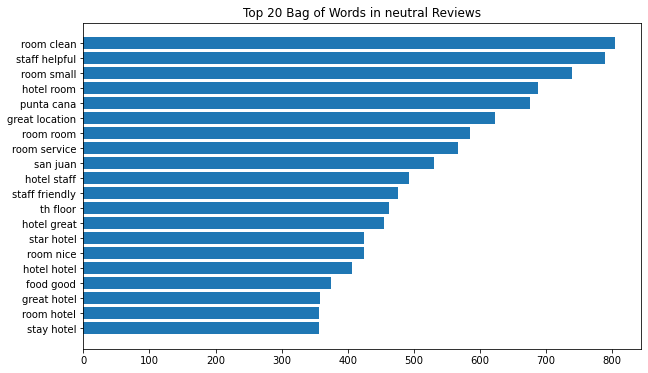

In [66]:
neutral_df = pd.DataFrame(CV.transform(neutral_reviews).toarray(),columns=CV.get_feature_names())


neutral_words = {}
for words in neutral_df.columns:
    neutral_words[words] = neutral_df[words].sum()
    
            
            
Neutral_df = pd.DataFrame({"Words":neutral_words.keys(),"Count":neutral_words.values()})
Neutral_df.sort_values("Count",ascending=False,inplace=True)
Neutral_df = Neutral_df.iloc[:20].sort_values("Count",ascending=True)


plt.figure(figsize=(10,6))
plt.barh(y=Neutral_df.Words,width=Neutral_df.Count)
plt.title("Top 20 Bag of Words in neutral Reviews")

#### Observations - 
- In respect to neutral reviews, some of the most frequently occured words with respect to the hotel are the Staff, Service, Beach, Food, Restaurant ,Bar, Pool and Water.


- Also, when using a bag of words model to identify a commonly used set of 2 words across neutral reviews, we observed many people calling out the cleaniness of the rooms, great location and helpful / friendly staff.


- However, there were many customers who called mentioned the room to be small or spoke about room service. These could be possible areas to consider.

### *Positive Reviews :*

In [67]:
positive_reviews = positive_reviews.apply(lambda x:nltk.word_tokenize(x))
positive_reviews = positive_reviews.apply(lambda x:nltk.pos_tag(x))
positive_reviews.head()

3     [(unique, JJ), (great, JJ), (stay, NN), (wonde...
4     [(great, JJ), (stay, NN), (great, JJ), (stay, ...
6     [(cozy, NN), (stay, NN), (rainy, JJ), (city, N...
7     [(excellent, JJ), (staff, NN), (housekeeping, ...
14    [(great, JJ), (hotel, NN), (night, NN), (quick...
Name: clean_text, dtype: object

In [68]:
named_entities = []
entity_types = []

for sent in positive_reviews:
    for entity_tag in sent:
        named_entities.append(entity_tag[0])
        entity_types.append(entity_tag[1])

positive_reviews_ner = pd.DataFrame({"Entity Name":named_entities,"Entity Type":entity_types})

In [69]:
positive_reviews_ner = (positive_reviews_ner.groupby(["Entity Name","Entity Type"])
                    .size().sort_values(ascending=False)
                    .reset_index()
                    .rename(columns={0:"Frequency"}))

positive_reviews_ner[positive_reviews_ner["Entity Type"] == "NN"].head(20)

,Entity Name,Entity Type,Frequency
0,hotel,NN,14889
1,room,NN,10812
3,staff,NN,5343
6,location,NN,4329
8,night,NN,3407
9,time,NN,2868
10,breakfast,NN,2821
12,stay,NN,2664
13,day,NN,2629
14,service,NN,2490


In [71]:
positive_reviews = positive_reviews.apply(lambda x:" ".join([word for word,pos in x if pos in ["NN","NNS","JJ","JJS","JJR"]]))
CV = CountVectorizer(ngram_range=(2,2),min_df=3,binary=False).fit(positive_reviews)

Text(0.5, 1.0, 'Top 20 Bag of Words in positive Reviews')

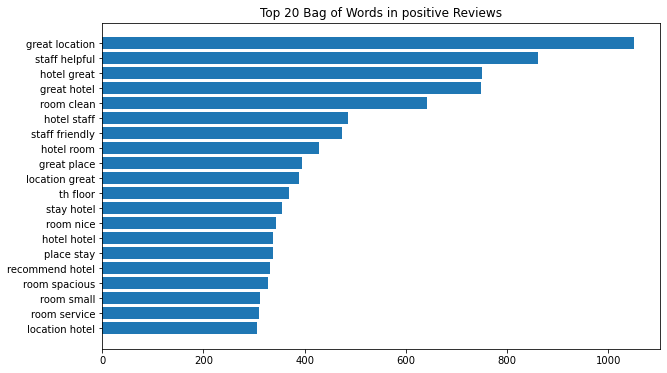

In [72]:
positive_df = pd.DataFrame(CV.transform(positive_reviews).toarray(),columns=CV.get_feature_names())


positive_words = {}
for words in positive_df.columns:
    positive_words[words] = positive_df[words].sum()
    
            
            
positive_df = pd.DataFrame({"Words":positive_words.keys(),"Count":positive_words.values()})
positive_df.sort_values("Count",ascending=False,inplace=True)
positive_df = positive_df.iloc[:20].sort_values("Count",ascending=True)


plt.figure(figsize=(10,6))
plt.barh(y=positive_df.Words,width=positive_df.Count)
plt.title("Top 20 Bag of Words in positive Reviews")

#### Observations - 
- In respect to positive reviews, some of the most frequently occured words with respect to the hotel are the Room, Staff, Location, Place, Breakfast, restaurant and the bar.


- Also, when using a bag of words model to identify a commonly used set of 2 words across negative reviews, we observed several customers calling the location great, calling out the staff of the hotel to be friendly and helpful and also acknowledging room and its cleanniness and space.
